In [1]:
#!pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

2.1.0


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
customers = pd.read_csv('bank.csv')
customers.head(100)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


In [4]:
#customer.info returs data type of each colunm and checks for null values 
print(customers.info())
#use customer.dtypes to check data type of each colunm 
print(customers.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber            int64
CustomerId           int64
Surname             object
CreditSc

In [5]:
#drop customerid and customerid and row number 
customers = customers.drop(columns=['RowNumber', 'CustomerId','Surname'])
customers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
customers = pd.get_dummies(customers, columns=['Geography','Gender']) #This function does One-Hot-Encoding on categorical text
customers

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [7]:
#drop Gender_female colunm

customers = customers.drop(columns=['Gender_Female'])
customers


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


In [8]:
customers.shape

(10000, 13)

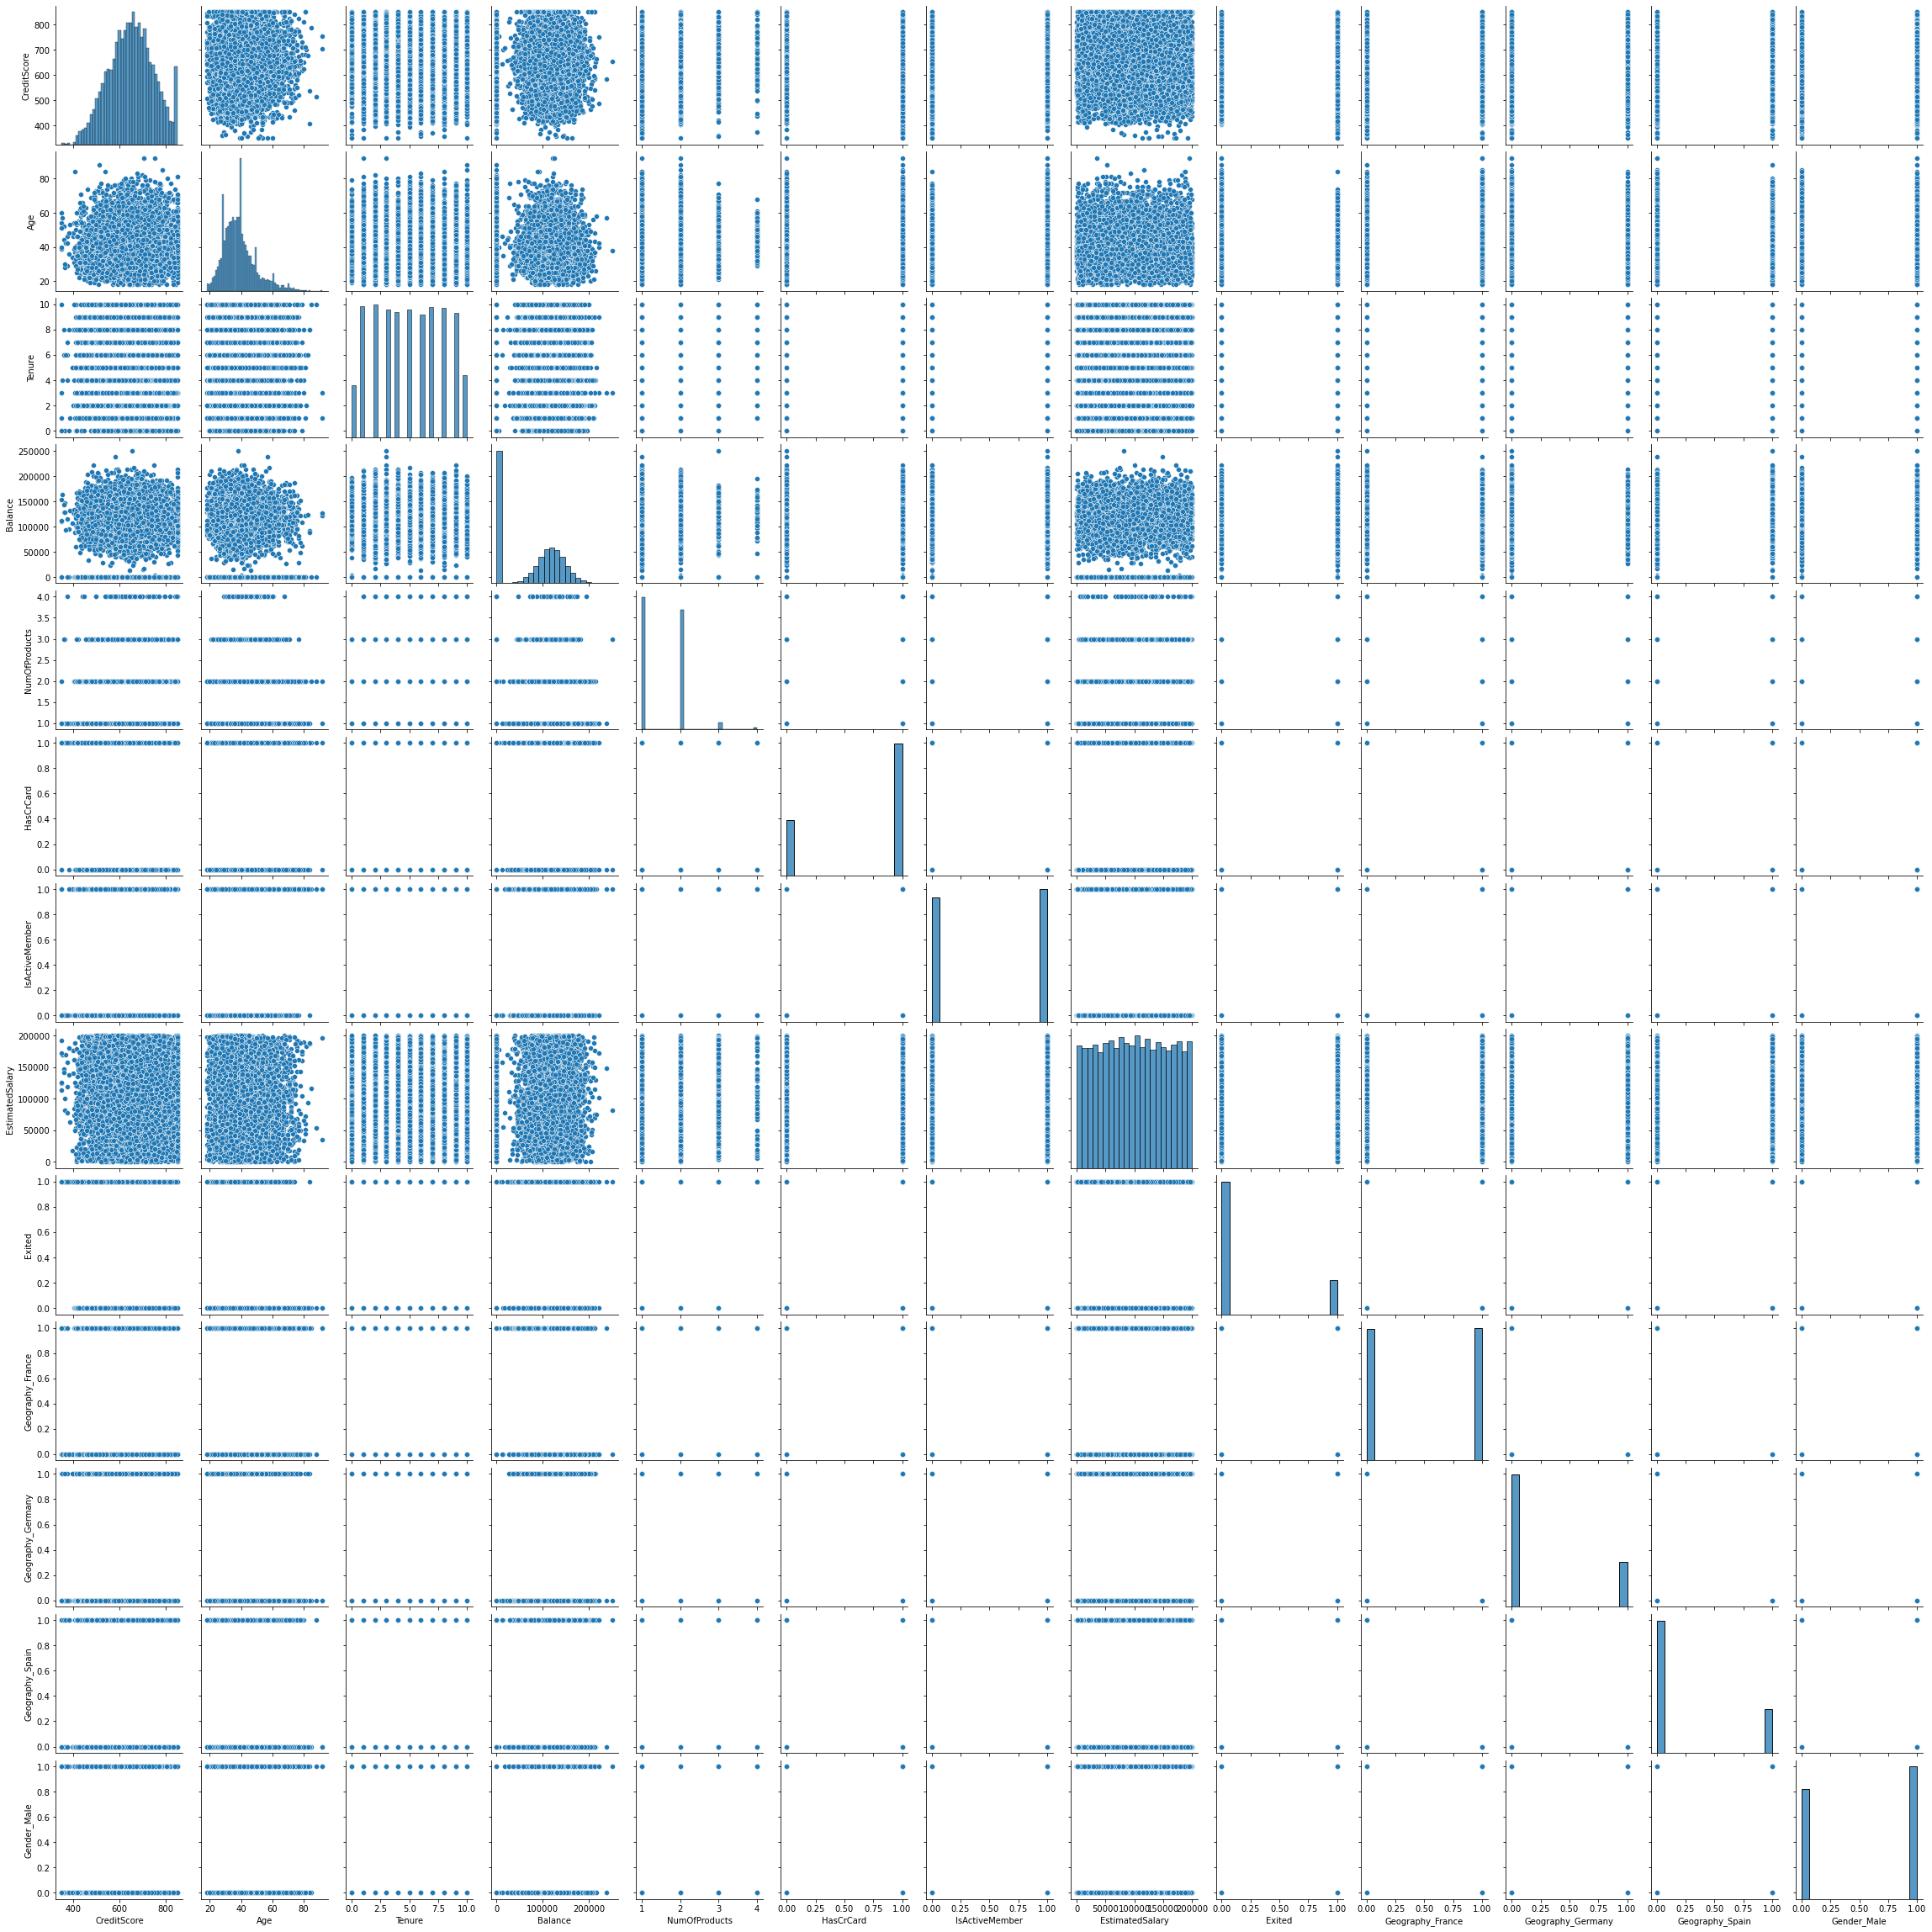

In [9]:
# bivarate analysis
sns.pairplot(customers)

In [10]:
#select target data and input data then split data
from sklearn.model_selection import train_test_split

X = customers.drop('Exited',axis=1)     # Predictor feature columns (8 X m)
Y = customers['Exited']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number
print(y_train.shape)
x_train.head()
print(y_test)

(7000,)
9953    0
3850    0
4962    0
3886    0
5437    0
       ..
5273    0
8014    0
8984    0
6498    0
6327    0
Name: Exited, Length: 3000, dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler
# define scaler on feature input colunms
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(x_train)
# transform both datasets
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape
print(x_train)

[[0.588      0.25675676 0.8        ... 0.         0.         0.        ]
 [0.262      0.28378378 0.6        ... 0.         0.         0.        ]
 [0.66       0.25675676 1.         ... 0.         0.         0.        ]
 ...
 [0.644      0.36486486 0.9        ... 0.         0.         0.        ]
 [0.626      0.28378378 0.8        ... 0.         0.         0.        ]
 [0.826      0.32432432 0.6        ... 1.         0.         1.        ]]


In [12]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=12, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [13]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:

# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)
#model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1) 

Train on 7000 samples
Epoch 1/150
7000/7000 [==============================] - 4s 555us/sample - loss: 0.4579 - accuracy: 0.8043
Epoch 2/150
7000/7000 [==============================] - 2s 305us/sample - loss: 0.4188 - accuracy: 0.8201
Epoch 3/150
7000/7000 [==============================] - 2s 264us/sample - loss: 0.3785 - accuracy: 0.8420
Epoch 4/150
7000/7000 [==============================] - 2s 234us/sample - loss: 0.3618 - accuracy: 0.8483
Epoch 5/150
7000/7000 [==============================] - 2s 239us/sample - loss: 0.3536 - accuracy: 0.8520
Epoch 6/150
7000/7000 [==============================] - 2s 228us/sample - loss: 0.3519 - accuracy: 0.8543
Epoch 7/150
7000/7000 [==============================] - 2s 236us/sample - loss: 0.3495 - accuracy: 0.8523
Epoch 8/150
7000/7000 [==============================] - 2s 233us/sample - loss: 0.3475 - accuracy: 0.8553
Epoch 9/150
7000/7000 [==============================] - 2s 256us/sample - loss: 0.3441 - accuracy: 0.8547
Epoch 10/150
70

7000/7000 [==============================] - 2s 296us/sample - loss: 0.2569 - accuracy: 0.8911
Epoch 77/150
7000/7000 [==============================] - 2s 337us/sample - loss: 0.2516 - accuracy: 0.8957
Epoch 78/150
7000/7000 [==============================] - 3s 412us/sample - loss: 0.2519 - accuracy: 0.8944
Epoch 79/150
7000/7000 [==============================] - 2s 294us/sample - loss: 0.2506 - accuracy: 0.8919
Epoch 80/150
7000/7000 [==============================] - 2s 273us/sample - loss: 0.2497 - accuracy: 0.8944
Epoch 81/150
7000/7000 [==============================] - 2s 262us/sample - loss: 0.2484 - accuracy: 0.8941
Epoch 82/150
7000/7000 [==============================] - 2s 227us/sample - loss: 0.2470 - accuracy: 0.8960
Epoch 83/150
7000/7000 [==============================] - 2s 219us/sample - loss: 0.2450 - accuracy: 0.8946
Epoch 84/150
7000/7000 [==============================] - 1s 212us/sample - loss: 0.2458 - accuracy: 0.8967
Epoch 85/150
7000/7000 [=================

In [15]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.828
Loss: 0.561


In [16]:
y_predict = model.predict(x_test)

In [17]:
y_pred = []
for val in y_predict:
    if ( val < 0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)
        
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [18]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2174  199]
 [ 317  310]]


In [19]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2373
           1       0.61      0.49      0.55       627

    accuracy                           0.83      3000
   macro avg       0.74      0.71      0.72      3000
weighted avg       0.82      0.83      0.82      3000

